# MOVIE RECOMMENDATION SYSTEM

# 1. Defining the Question.

## a) Specifying the data analytic question.

> Ichigo is a movie company that wants to expand their horizons and make a recommender system  called MovieLens based on collaborative filtering for thousands of their clients. The recommender system aims to improve user experience by offering personalized movie recommendations catering to each user's preferences.
A better user experience, in turn, increases user satisfaction, engagement, and retention, thus increasing the profitability of the streaming platforms it serves. MovieLens has collected user ratings and movie watch history data on its platform to aid this research.




>  __Problem Statement:__ To build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.


## b) Defining the metric of success: 
> Having a model that has a low RMSE and a high recall score.

## c) Recording the Experimental Design.

- Research Question: Can a user get 5 movie recommendations based on their ratings of other movies.
- Data source: The MovieLens dataset contains 100,000 ratings, as well as demographic information and movie metadata, collected from 9,000 movies by 600 users. The dataset was collected and made available by GroupLens, a research lab at the University of Minnesota. The purpose of the dataset is to enable research in recommendation systems and related fields.The dataset can be downloaded from the GroupLens website (https://grouplens.org/datasets/movielens/latest/).
- Variables: The variables in the merged data set are:'userId', 'movieId', 'rating', 'title', 'genres', 'year'.
- Model evaluation: The metrics used to evaluate the model's performance are:accuracy,recall and RMSE.
- Conclusions and recommendations.

# 2. Loading the data

In [2]:
#Importing relevant libraries
from collections import Counter
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
# Loading the Datasets
movies= pd.read_csv("ml-latest-small/movies.csv")
links= pd.read_csv("ml-latest-small/links.csv")
ratings= pd.read_csv("ml-latest-small/ratings.csv")
tags= pd.read_csv("ml-latest-small/tags.csv")


In [4]:
#print the number of movies in our dataset.
print(f"Total number of movies are {movies['title'].nunique()}")

Total number of movies are 9737


# 3. Data Understanding

The MovieLens dataset contains 100,000 ratings, as well as demographic information and movie metadata, collected from  9,000 movies by 600 users. The dataset was collected and made available by GroupLens, a research lab at the University of Minnesota. The purpose of the dataset is to enable research in recommendation systems and related fields. 

The dataset can be downloaded from the GroupLens website (https://grouplens.org/datasets/movielens/latest/).

In [5]:
#check the first data set info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
#checking for null values 
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
#checking for duplicates
movies.duplicated().sum()

0

In [8]:
#previewing the second dataset
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
#check the second data set info
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [10]:
#checking for null values in the second data set .
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [11]:
#checking for duplicates in the second data set
links.duplicated().sum()

0

In [12]:
#previewing the third dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
#checking the data set info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
#checking for missing values.
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
#checking for duplicates.
ratings.duplicated().sum()

0

In [16]:
#preview the fourth dataset
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [17]:
#check data set info
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [18]:
#checking for missing values
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

# 4. External Data Source Validation

# 5. Data Preprocessing

In [19]:
#merge the data sets(movies & ratings)
#set index 
movie_ratings = pd.merge(ratings, movies, on='movieId', how = 'inner')
movie_ratings.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [20]:
# Checking for Duplicates
duplicates = movie_ratings.duplicated(subset=['userId', 'movieId'])
print(duplicates.sum())

0


In [21]:
# Verifying number of Users 
print(f"Total number of users are {movie_ratings['userId'].nunique()}")

Total number of users are 610


In [22]:
# Verifying no. of Movies 
print(f"Total number of movies are {movie_ratings['title'].nunique()}")

Total number of movies are 9719


In [23]:
#Dropping the timestamp column
df= movie_ratings.drop(['timestamp'], axis=1)
df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
#checking for null values in the merged data frame
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [25]:
#checking for duplicates in the merged data frame
df.duplicated().sum()

0

The merged data frame has no duplicates or missing values.

In [26]:
# Seperate the Genres Column and Encoding them with One-Hot Encoding
genres = []
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        if x not in genres:
            genres.append(x)


> For better analysis,the genre column is split and encoded.

In [27]:
# Group the movie_ratings DataFrame by movie title and calculate the average rating
avg_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_ratings

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [28]:
# Grouping by the total no. of rating of the movies
rat_count = df.groupby('title')['rating'].count().sort_values(ascending=False)
rat_count

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [29]:
#Stripping the title to extract the year of release.
df['year'] = df['title'].str.extract('.*\((.*)\).*',expand = False)
df.tail()

,userId,movieId,rating,title,genres,year
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller,1997
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama,1971
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller,2005
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller,2016
100835,610,163981,3.5,31 (2016),Horror,2016


In [30]:
# replacing the range with a specific year
df['year'] = df['year'].replace("2006–2007","2007")

In [49]:
df.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'year'], dtype='object')

# 6. Exploratory analysis.

## Univariate Analysis

In [31]:
# previewing descriptive statistics of the data set.
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [32]:
# check merged data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
 4   genres   100836 non-null  object 
 5   year     100819 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.9+ MB


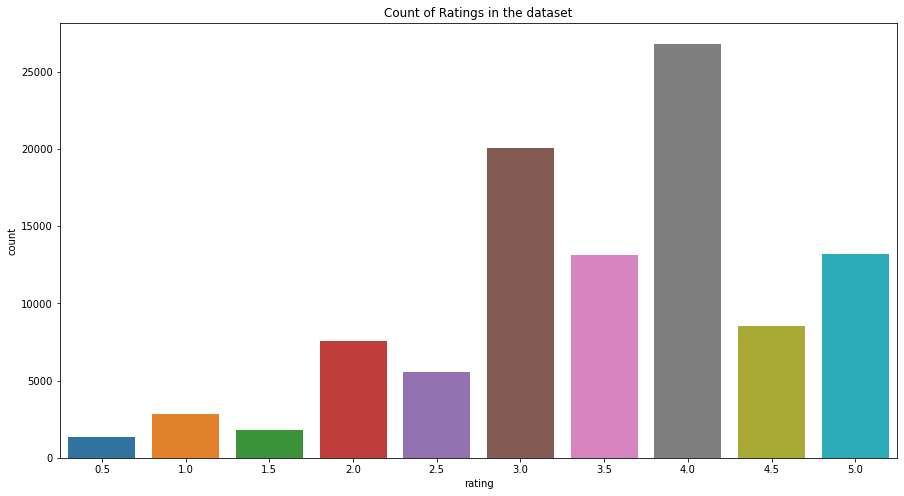

In [33]:
# Distribution of movie ratings.
plt.figure(figsize=(15, 8))
sns.countplot(df['rating'])
plt.title('Count of Ratings in the dataset');

> As seen,the distribution of the rating is not normal.Also,the most number of ratings were in the group of 4.0

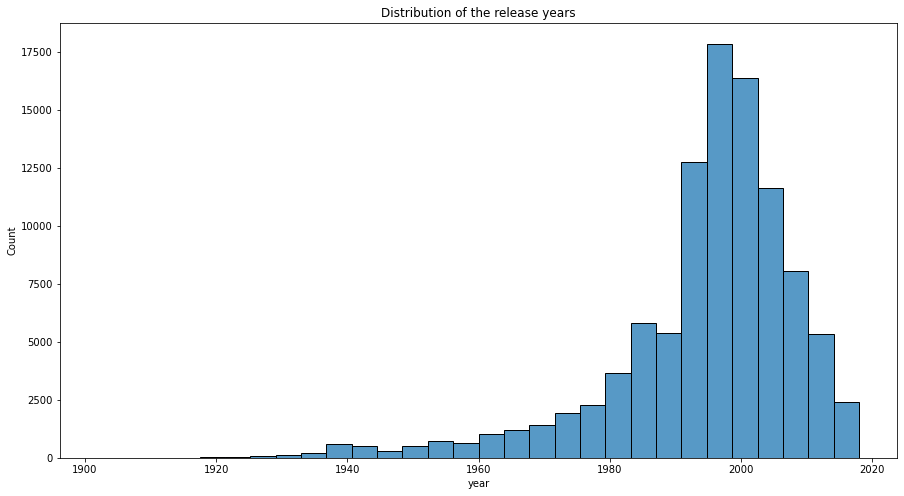

In [34]:
#plot distribution of release years
df['year'] = pd.to_numeric(df['year'])
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='year', bins=30)
plt.title('Distribution of the release years');


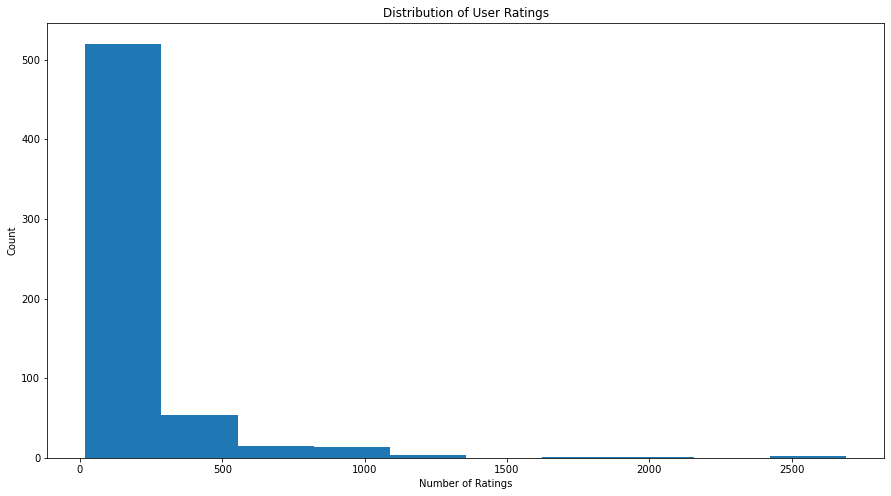

In [43]:
# histogram of number of ratings per user
plt.figure(figsize=(15,8))
plt.hist(user_ratings, bins=10)
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.title('Distribution of User Ratings')
plt.show()

### Bivariate Analysis

In [44]:
period_length = 20
start_year = 1940
end_year = 2019
df = df[(df['year'] >= 1940) & (df['year'] <= 2019)]

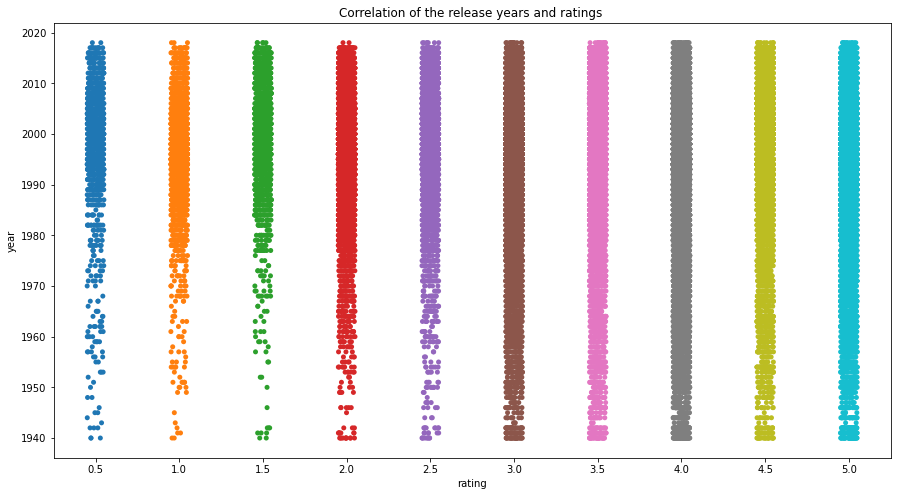

In [37]:
#correlation between rating and year of production
plt.figure(figsize=(15, 8))
plt.title('Correlation of the release years and ratings ')
sns.stripplot(data=df,x='rating',y='year');

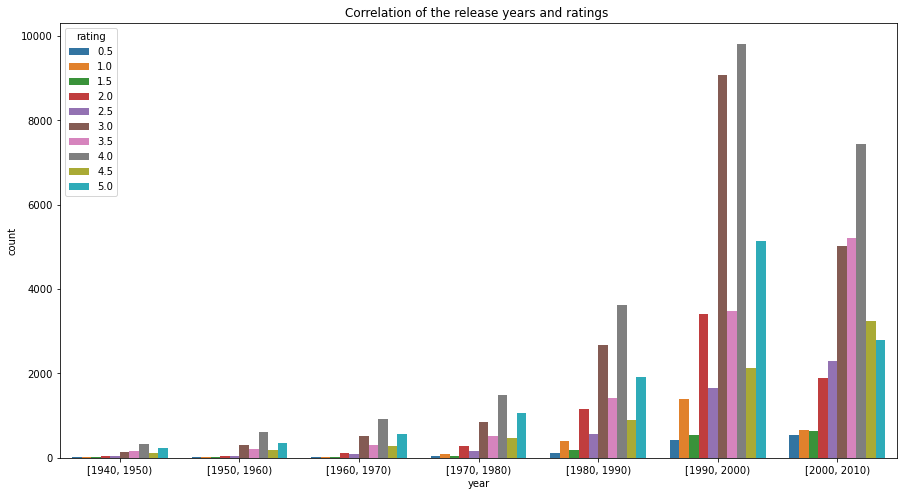

In [45]:
#correlation between year of release and rating
df_extra = df.copy()
df_extra['year'] = pd.cut(df_extra['year'], range(1940, 2019, 10), right=False)
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df_extra, x='year', hue='rating')
plt.title('Correlation of the release years and ratings ')
ax;